In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
dataset = pd.read_csv("MSFT.csv")

In [4]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,150.073992,151.687115,148.347945,150.105731,149.459580,3.208340e+07
std,16.718858,17.140189,16.300557,16.809441,17.167431,1.816507e+07
min,121.279999,123.279999,119.010002,119.839996,118.712952,8.989200e+06
25%,137.250000,138.399994,136.029999,137.119995,136.233078,2.007820e+07
50%,144.399994,146.419998,142.990005,144.460007,143.577957,2.495890e+07
75%,162.610001,163.710007,161.029999,162.130005,161.837952,3.666960e+07
max,190.649994,190.699997,186.470001,188.699997,188.185989,9.707360e+07


In [5]:
X = dataset[["Open","High","Low","Volume"]]
y = dataset["Close"]

####  MODEL 1

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
model.coef_

array([ -3.86686577e-01,   4.64206302e-01,   9.29460473e-01,
         1.12066407e-09])

In [9]:
predicted = model.predict(X_test)
results = pd.DataFrame({"Actual":y_test,"predicted":predicted})

In [10]:
results.head()

,Actual,predicted
208,158.830002,148.652661
6,126.239998,126.797137
79,137.520004,137.380721
204,150.619995,153.959260
117,143.369995,143.800067


In [11]:
print("Mean Absolute error : {0}".format(metrics.mean_absolute_error(y_test,predicted)))
print("Mean squared error : {0}".format(metrics.mean_squared_error(y_test,predicted)))
print("Mean Absolute error : {0}".format(math.sqrt(metrics.mean_squared_error(y_test,predicted))))

Mean Absolute error : 1.1728225624522781
Mean squared error : 3.9563373345384085
Mean Absolute error : 1.989054381996231


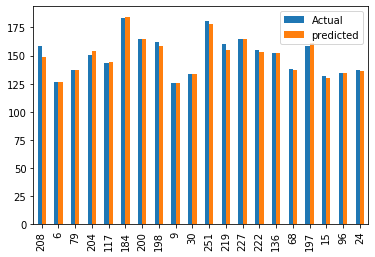

In [12]:
graph = results.head(20)
graph.plot(kind='bar')

#### MODEL 2

In [13]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-16,126.750000,129.380005,126.459999,128.929993,127.717468,30112200
1,2019-05-17,128.309998,130.460007,127.919998,128.070007,126.865570,25770500
2,2019-05-20,126.519997,127.589996,125.760002,126.220001,125.032967,23706900
3,2019-05-21,127.430000,127.529999,126.580002,126.900002,125.706573,15293300
4,2019-05-22,126.620003,128.240005,126.519997,127.669998,126.469322,15396500


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [15]:
forecast_days = 20
forecast = dataset["Adj Close"].shift(-forecast_days)

In [16]:
forecast.tail(20)

233   NaN
234   NaN
235   NaN
236   NaN
237   NaN
238   NaN
239   NaN
240   NaN
241   NaN
242   NaN
243   NaN
244   NaN
245   NaN
246   NaN
247   NaN
248   NaN
249   NaN
250   NaN
251   NaN
252   NaN
Name: Adj Close, dtype: float64

In [17]:
X = np.array(dataset[["Adj Close"]])
X = X[:-forecast_days]

In [18]:
y = np.array(forecast[:-forecast_days])
print(len(X),len(y))

233 233


In [19]:
# split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [20]:
# SVM regressor
svr = SVR(kernel='rbf',C=1e3,gamma=0.1)
svr.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
svr_confidence = svr.score(X_test,y_test)
print("Confidence score : {0}".format(svr_confidence))

Confidence score : 0.361147638288506


In [22]:
# Linear Regression
lr_model2 = LinearRegression()
lr_model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
lr2_confidence = lr_model2.score(X_test,y_test)
print(lr2_confidence)

0.512510398019


In [24]:
# Forecasting on last 10 values which we shifted earlier
# using lr_model2
x_forecast = np.array(dataset[["Adj Close"]][-forecast_days:])
predicted_values = lr_model2.predict(x_forecast)

In [25]:
actual_values = dataset["Adj Close"][-forecast_days:]
results = pd.DataFrame({"actual":actual_values,"predicted":predicted_values})

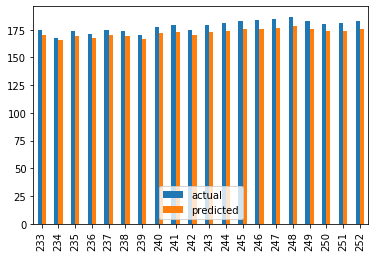

In [26]:
results.head()
results.plot(kind='bar')

#### 

In [27]:
from matplotlib import style

Text(0, 0.5, 'Price')

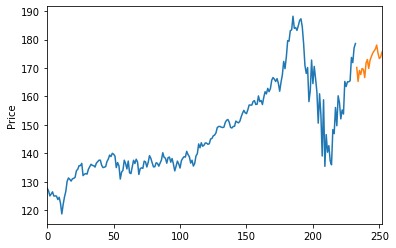

In [28]:
dataset["Adj Close"][:-forecast_days].plot()
results["predicted"].plot()
plt.ylabel("Price")

In [29]:
import pickle
with open('C:/Users/varun/Desktop/Machine_Learning/src/LinearRegression_stockForecast_model.pickle','wb') as f:
    pickle.dump(lr_model2,f)
    

In [30]:
pickle_in = open('LinearRegression_stockForecast_model.pickle','rb')
clf = pickle_in

In [31]:
#### Linear Regression

In [32]:
dataset2 = pd.read_csv('datasets_14872_228180_Admission_Predict.csv')
dataset2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [33]:
df = dataset2.drop(['Serial No.'],axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

C:\Users\varun\Anaconda\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


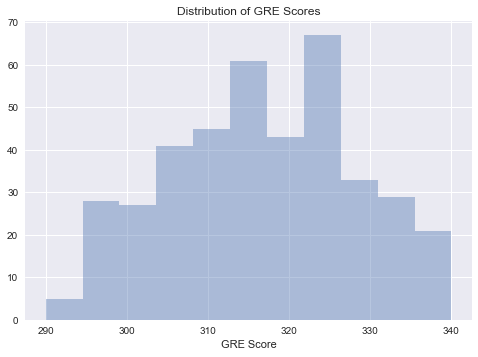

C:\Users\varun\Anaconda\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


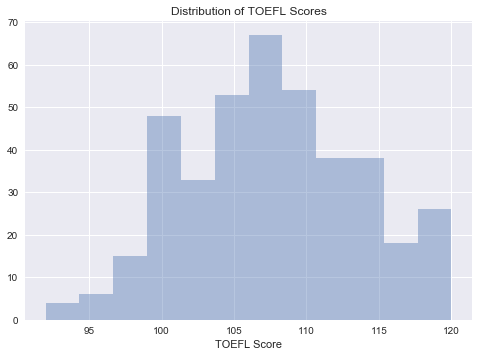

C:\Users\varun\Anaconda\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


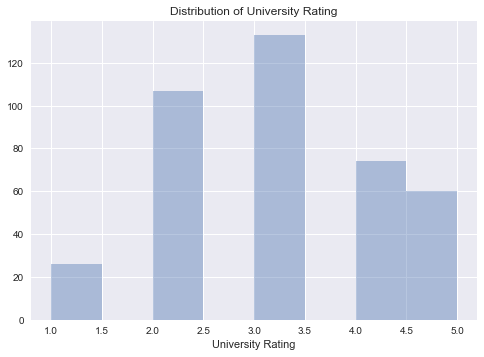

C:\Users\varun\Anaconda\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


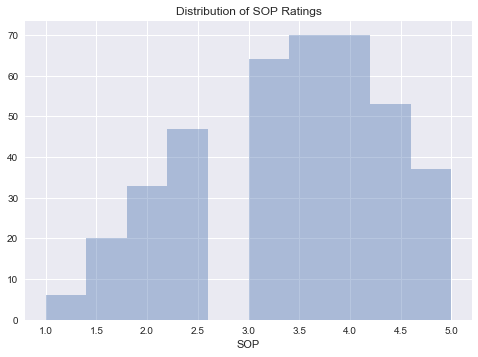

C:\Users\varun\Anaconda\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


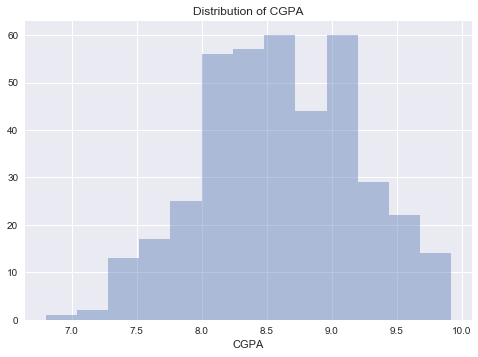

In [34]:
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()


                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   

                       LOR       CGPA  Research  
GRE Score          0.557555  0.833060  0.580391  
TOEFL Score        0.567721  0.828417  0.489858  
University Rating  0.660123  0.746479  0.447783  
SOP                0.729593  0.718144  0.444029  
LOR                1.000000  0.670211  0.396859  
CGPA               0.670211  1.000000  0.521654  
Research           0.396859  0.521654  1.000000  


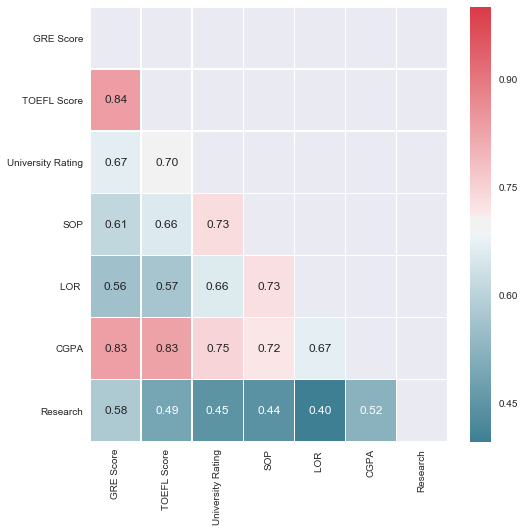

In [35]:
corr = df.loc[:,df.columns != 'Chance of Admit '].corr() 
print(corr)
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [36]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)


In [37]:
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Linear Regression",np.sqrt(mean_squared_error(y_test, predictions)))

Linear Regression 0.0792044726009


In [44]:
from collections import defaultdict
models = defaultdict(list)


In [49]:
y = df['Chance of Admit ']
for col in X.columns:
    X_cols = df[[col]]
    for _ in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X_cols,y,test_size = 0.20,shuffle= True)
        model = LinearRegression()
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        models[col].append(np.sqrt(mean_squared_error(y_test,predictions)))
        

In [54]:
for col in models:
    print("column {0}  has error : {1}".format(col,np.mean(models[col])))

column GRE Score  has error : 0.08510749722237848
column TOEFL Score  has error : 0.0896325677261744
column University Rating  has error : 0.10251515091044894
column SOP  has error : 0.10415566220405101
column LOR   has error : 0.105539361382881
column CGPA  has error : 0.06815772428567775
column Research  has error : 0.12713504897286432


In [55]:
# CGPA, GRE Score, TOEFL Score has least error in ascending order
# the three columns have high collinearity 0.83 with each other we can choose 1 column for the model - CGPA

In [59]:
X = df[["CGPA"]]
y = df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X_cols,y,test_size = 0.20,shuffle= True)
final_model = LinearRegression()
final_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
with open("finalModel_admission.pickle","wb") as f:
    pickle.dump(final_model,f)

In [61]:
## END